##### Work in progress

# Jacksonville Single-Family Housing

### Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/Robin/OneDrive/Documents/Python/DuvalSFR.csv')
df.shape

(272233, 96)

In [6]:
df = df.drop(columns=['property_use','perc_complete','fence','fence_units','fence_ppu','fence_yr_built',
                     'boatcv','boatcv_units','boatcv_ppu','boatcv_yr_built'])
df.neighborhood = df.neighborhood.astype('object')
df = df.fillna(
    value={'mailing_state':'NA', 'subdivision':'NA', 'land_val':0, 'feature_val':0, 'char_descr':'NA',
            'stories':round(np.mean(df.stories),1), 'bedrooms':round(np.mean(df.bedrooms),1), 
            'baths':round(np.mean(df.baths),1), 'rooms':round(np.mean(df.rooms),1), 
            'site_address':'NA', 'zipcode':'NA',
            'carport':0,'carport_units':0, 'carport_ppu':0,'carport_yr_built':0,
            'covpatio':0,'covpatio_units':0, 'covpatio_ppu':0,'covpatio_yr_built':0,
            'deck':0,'deck_units':0, 'deck_ppu':0,'deck_yr_built':0,
            'dock':0,'dock_units':0, 'dock_ppu':0,'dock_yr_built':0,
            'fireplace':0,'fireplace_units':0, 'fireplace_ppu':0,'fireplace_yr_built':0,
            'pool':0,'pool_units':0, 'pool_ppu':0,'pool_yr_built':0,
            'scrporch':0,'scrporch_units':0, 'scrporch_ppu':0,'scrporch_yr_built':0,
            'screncl':0,'screncl_units':0, 'screncl_ppu':0,'screncl_yr_built':0,
            'shed':0,'shed_units':0, 'shed_ppu':0,'shed_yr_built':0,
            'addition':0,'addition_area':0,
            'balcony':0,'balcony_area':0,
            'garage':0,'garage_area':0,
            'porch':0,'porch_area':0,
            'storage':0,'storage_area':0,
            'upperstory':0,'avg_upperstory_area':0,
            'trans_id':'NA', 'seller':'NA','sale_date':'NA','buyer':'NA','price':0
            }
    )

In [ ]:
cleaned_site = []
for site in df.site_address:
    

In [88]:
sales = df[~df.sale_date.isnull()]
sales = sales[~sales.sale_date.str.contains('M')]
sales.sale_date = sales.sale_date.astype('datetime64[ns, US/Eastern]')
sales.head()

,RE,mailing_address,mailing_city,mailing_state,property_use,subdivision,neighborhood,cap_base_yr,building_val,land_val,...,balcony,balcony_area,garage,garage_area,porch,porch_area,storage,storage_area,upperstory,avg_upperstory_area
1,000007 0010,PO BOX 23637,JACKSONVILLE,FL,100,SECTION LAND,417300.20,0,50003,22688.0,...,NaN,NaN,NaN,NaN,2.0,520.0,NaN,NaN,NaN,NaN
27,000038 0010,18890 CARTER RD,JACKSONVILLE,FL,100,SECTION LAND,417300.36,1995,125615,17500.0,...,NaN,NaN,2.0,921.0,1.0,64.0,1.0,280.0,NaN,NaN
71,000128 0020,40 MILL ST E,BALDWIN,FL,100,OLIVERS ADDN TO BALDWIN,817300.21,2019,41385,19000.0,...,NaN,NaN,NaN,NaN,1.0,24.0,NaN,NaN,NaN,NaN
78,000147 0010,48 ORANGE ST E,BALDWIN,FL,100,MOODYS ADDN TO BALDWIN,817300.21,2020,95313,19200.0,...,NaN,NaN,NaN,NaN,2.0,211.0,NaN,NaN,NaN,NaN
83,000157 0028,602 CHESTNUT ST N,BALDWIN,FL,100,MOODYS ADDN TO BALDWIN,817300.21,2020,123545,15480.0,...,NaN,NaN,1.0,400.0,1.0,25.0,NaN,NaN,NaN,NaN


## Market Overview

### Inventory and Sales

In [25]:
print("Inventory:")
print("Single-family homes in Jacksonville:", str(len(df.RE.unique()))[:3]+','+str(len(df.RE.unique()))[-3:])
print("Total valuation:", "$"+str(round(np.sum(df.just_val)/1000000000,2)), "billion")
print("Average market value:", "$"+str(int(np.mean(df.just_val)))[:-3]+','+str(int(np.mean(df.just_val)))[-3:])
print("Average home size:", str(int(np.mean(df.heated_sf)))[:-3]+','+str(int(np.mean(df.heated_sf)))[-3:]+" square feet")
print("Average vpsf:", "$"+str(int(np.mean(df.just_val)/np.mean(df.heated_sf))),"per square foot")
print("Average lot size:", str(int(np.mean(df.lot_size)))[:-3]+','+str(int(np.mean(df.lot_size)))[-3:]+" square feet")
print("Average age:", str(2020 - int(np.mean(df.actual_yr_built)))+"-years-old")
print()
print("Sales:")
print("Completed, qualified sales from Jan. 1, 2018 to Aug. 18, 2018:", 
      str(len(df[df.price>0].price))[:-3]+","+str(len(df[df.price>0].price))[-3:])
print("Total revenue from sales:", "$"+str(round(np.sum(df.price)/1000000000,2)), "billion")
print("Average sales price:", "$"+str(int(np.mean(df.price)))[:-3]+","+str(int(np.mean(df.price)))[-3:])
print("Average home size:", str(int(np.mean(sales.heated_sf)))[:-3]+","+str(int(np.mean(sales.heated_sf)))[-3:])
print("Average ppsf:", "$"+str(int(np.mean(sales.price)/np.mean(sales.heated_sf))),"per square foot")
print("Average age:", str(2020 - int(np.mean(sales.actual_yr_built)))+"-years-old")

Inventory:
Single-family homes in Jacksonville: 269,302
Total valuation: $52.92 billion
Average market value: $194,409
Average home size: 1,761 square feet
Average vpsf: $110 per square foot
Average lot size: 15,291 square feet
Average age: 42-years-old

Sales:
Completed, qualified sales from Jan. 1, 2018 to Aug. 18, 2018: 40,466
Total revenue from sales: $9.88 billion
Average sales price: $244,071
Average home size: 1,823
Average ppsf: $133 per square foot
Average age: 34-years-old


### Sales Trends

The year started hot for home sales. January and February of this year saw more sales than the same months in 2018 and 2019. Even with a slow down in March, the first quarter of 2020 had more sales than first quarter of the two prior years.

However, as lockdowns began in response to the spread of Covid-19 in the U.S., sales fell dramatically. Sales hit bottom in May at 897. This likely indicated both a pullback in demand - as layoffs, furloughs and general uncertainty prompted many to delay making large purchases - and constraints on the ability to process sales - as lockdowns impeded the ability to get properties appraised, documents notarized, city fees cleared and the like.

After the U.S. approved a massive stimulus package and interest rates fell, sales picked back up to the pace set in January and February of this year. However, monthly sales remain well below the typically high monthly numbers seen in the summer months, which is the peak season for home sales. It is not yet clear if this represents an actual decrease in sales or if this year's peak season has been delayed or prolonged by Covid-19. 

While sales have remained depressed, the median price-per-square-foot each month has remained high. As of July - the last full month of data in this dataset - the median ppsf of $128.87 was higher than the same month in 2018 and 2019. External data indicate this is due to high demand and low supply - the number of listing viewings has increased year-over-year, but the number of new home listings has decreased year-over-year. 

<div>
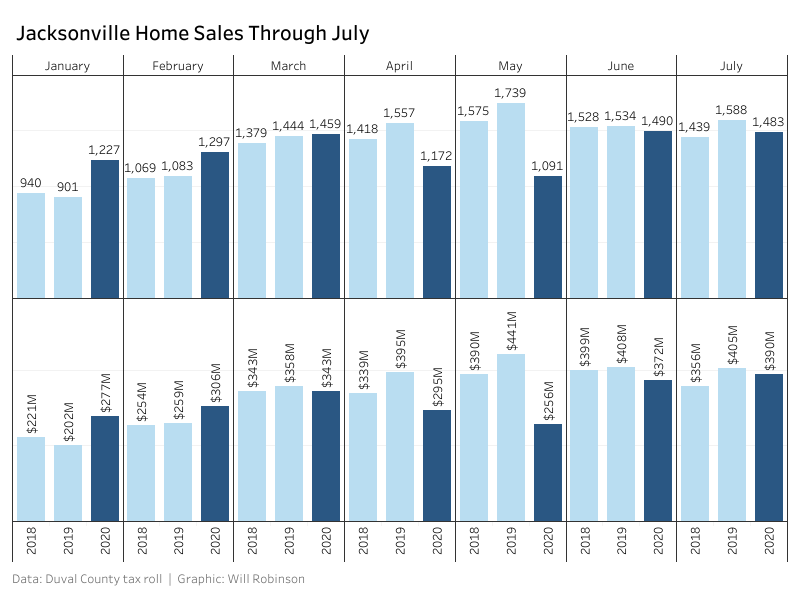
</div>

The count of sales and the median price per square foot increased in most Jacksonville zip codes from 2018 to 2019. Sales are highest in North Jacksonville, near the airport, while price per square foot is highest near the beaches and St. Johns County to the south. 

Price per square foot and sales are both low in the downtown area, with the exception of Avondale to the east. This is unsurprising, given that the downtown area has a higher concentration of multifamily housing than single-family housing.

<div>
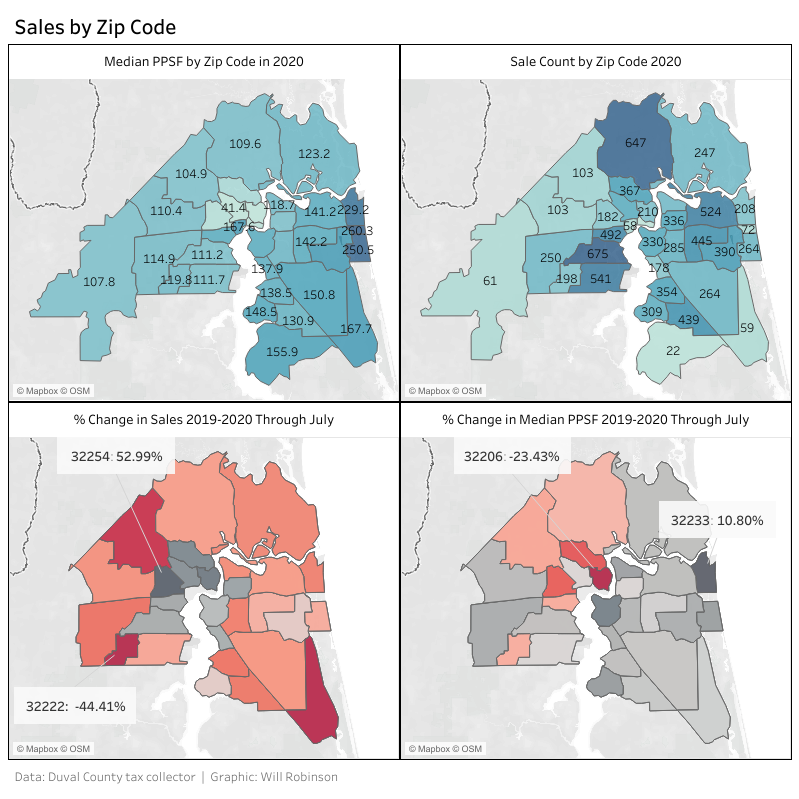
</div>

<div>
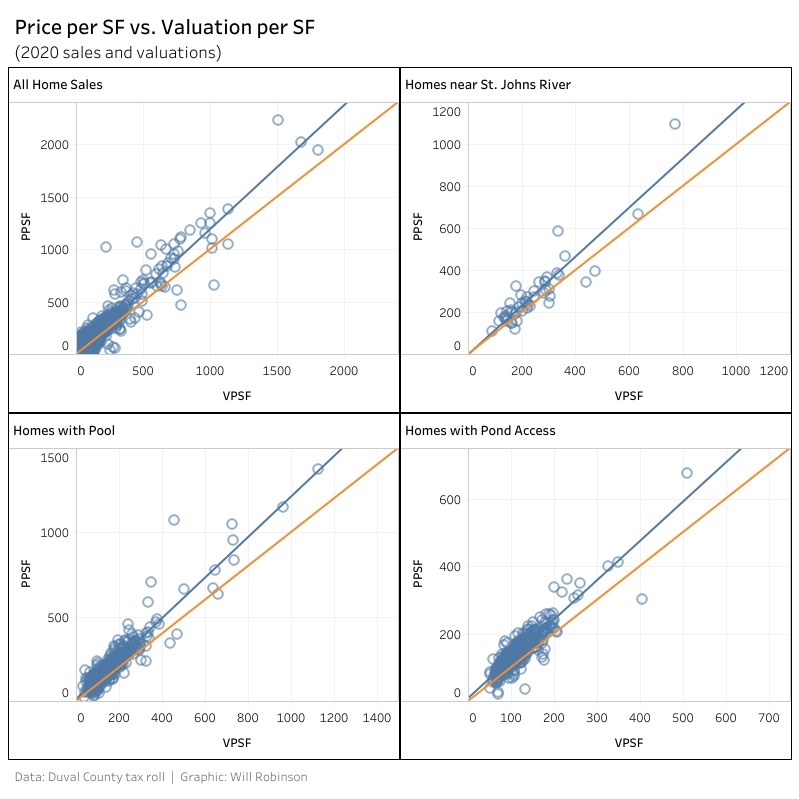
</div>

<div>
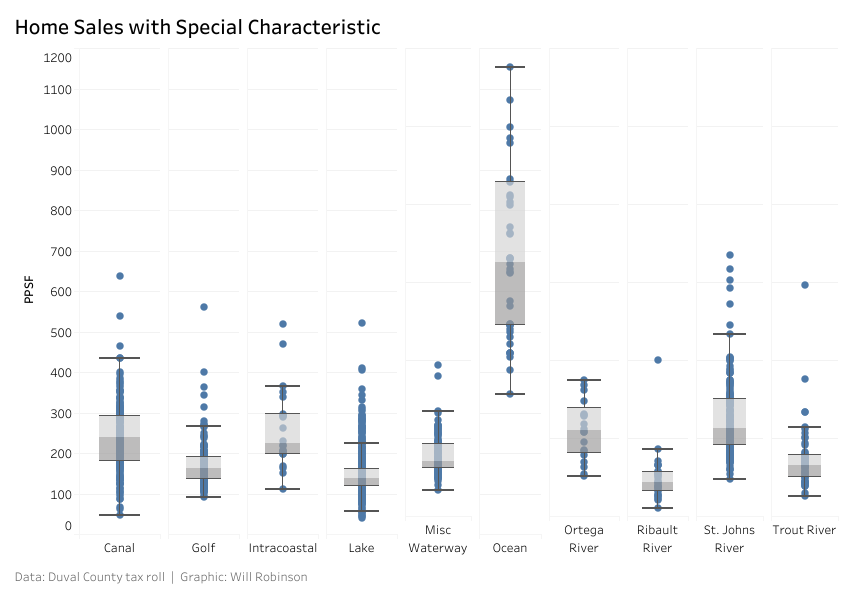
</div>

<div>
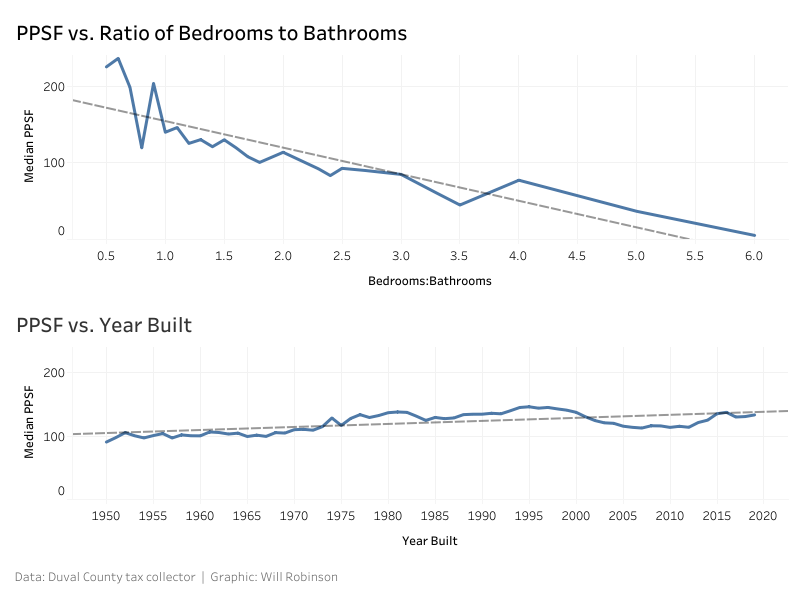
</div>

<div>
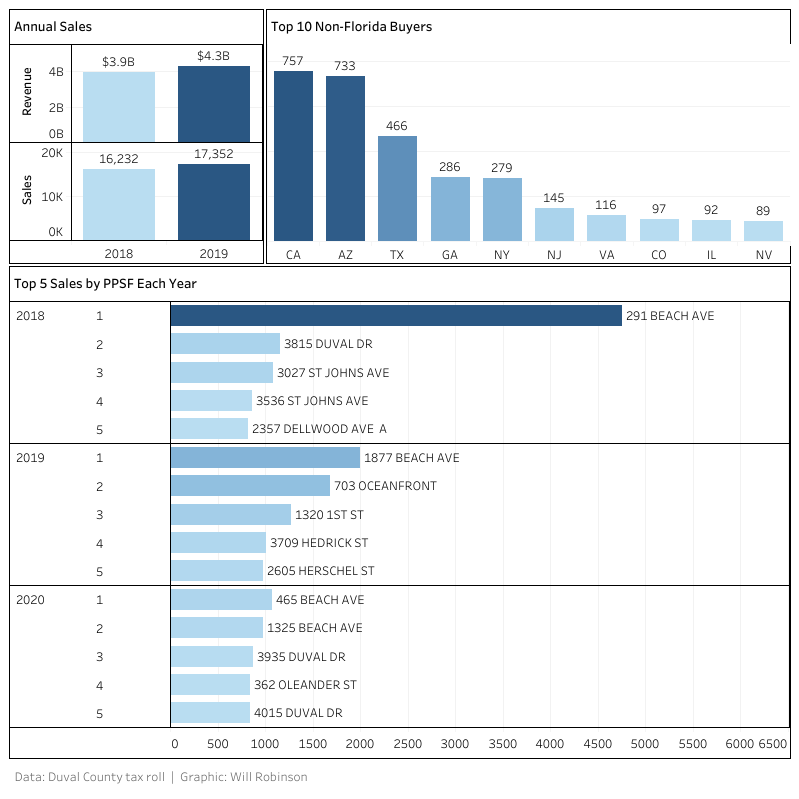
</div>

### Construction

Home construction started along the St. Johns River and along the ocean. It has continued further and further inland over time. 

Construction soared during the housing boom of the 2000s, hitting an all-time high of more than 47,000 homes built that decade. The pace of construction then plummeted starting in 2006, bottoming out at about 1,000 homes built in 2011 - a seventh of what was built in 2006.  

Construction has picked up every year since 2011, but more gradually than what the area experienced during the boom years. About 4,250 homes were built last year.

<div>
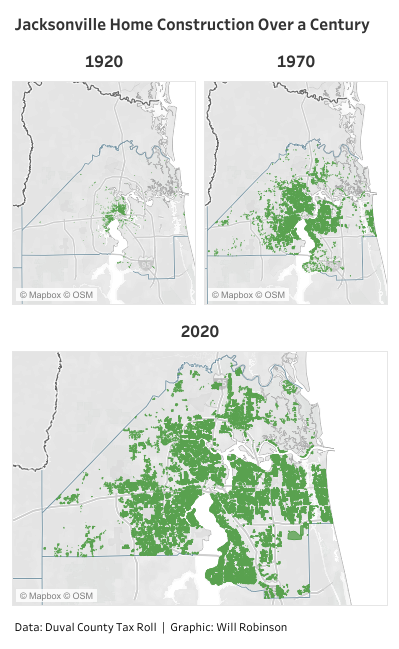
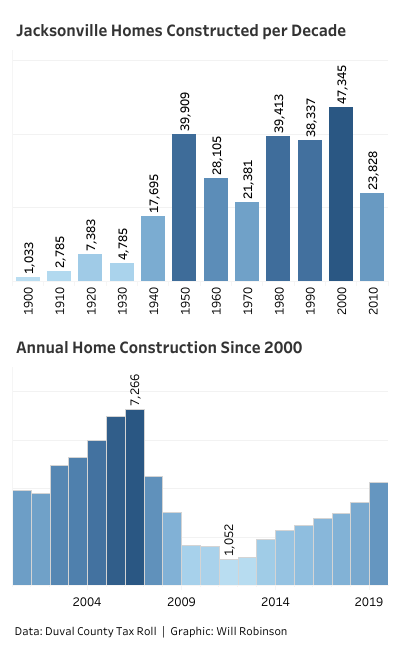
</div>


-----------------------------------------------------------------------------------------------------

In [10]:
reduced = df[['subdivision','neighborhood','mailing_address', 'mailing_state', 'bedrooms','baths','rooms','stories',
             'property_value','county_taxable','type_descr','style','class','quality',
             'yr_built','heated_sf','sale_date','eff_price','cov_patio','deck_ft','fireplace',
             'pool','additions','carports','garages','porches','storages','upper_stories','ppsf']]
reduced.shape

(58983, 29)

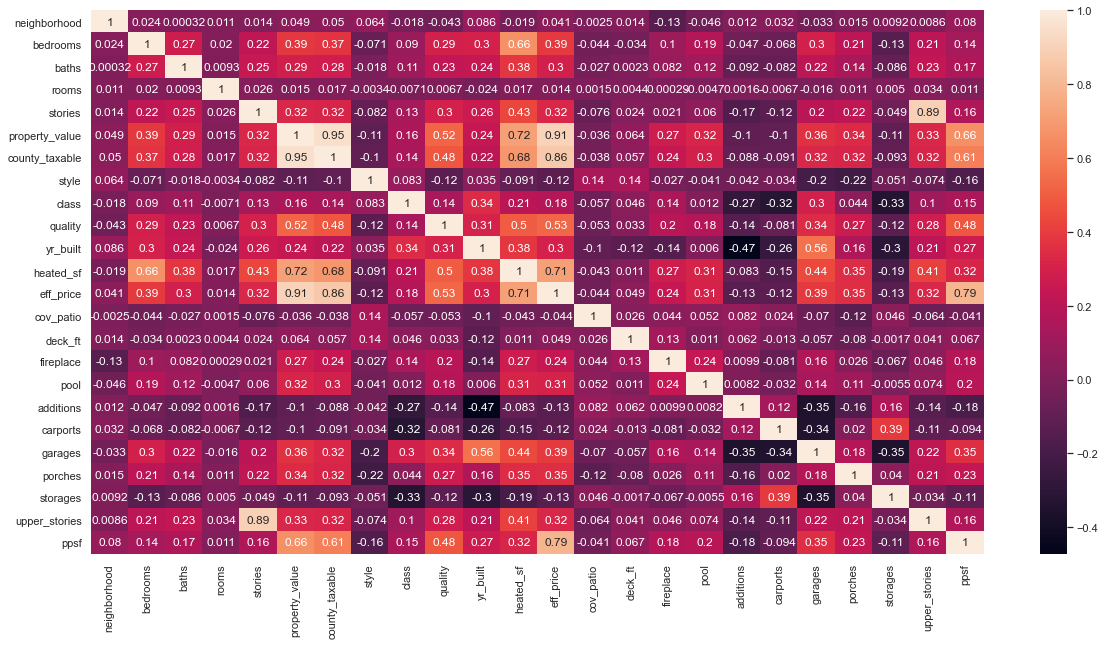

In [11]:
plt.figure(figsize=(20,10))
im = sns.heatmap(reduced.corr(), annot=True)